In [13]:
import requests
import pandas as pd

url1 = 'https://api.apify.com/v2/datasets/mf3Z9MUGQX7pLQe7n/items?token=apify_api_XIePayhLWdKdnie4nfc2ttXEjxhRBe2z0cal'
url2 = 'https://api.apify.com/v2/datasets/VSptwAMQnJItV5GRv/items?token=apify_api_XIePayhLWdKdnie4nfc2ttXEjxhRBe2z0cal'
url3 = 'https://api.apify.com/v2/datasets/DdwxRgeHgey8jbuMZ/items?token=apify_api_XIePayhLWdKdnie4nfc2ttXEjxhRBe2z0cal'
url4 = 'https://api.apify.com/v2/datasets/bQp6XV9t7ZqeZMkVb/items?token=apify_api_XIePayhLWdKdnie4nfc2ttXEjxhRBe2z0cal'
url5 = 'https://api.apify.com/v2/datasets/dwVzCQ2PhRrk2hNMg/items?token=apify_api_XIePayhLWdKdnie4nfc2ttXEjxhRBe2z0cal'
url6 = 'https://api.apify.com/v2/datasets/h7Yoq6uhcjW9qeyjP/items?token=apify_api_XIePayhLWdKdnie4nfc2ttXEjxhRBe2z0cal'


response1 = requests.get(url1)
response2 = requests.get(url2)
response3 = requests.get(url3)
response4 = requests.get(url4)
response5 = requests.get(url5)
response6 = requests.get(url6)

# if response1.status_code == 200:
#     # If the request was successful, proceed with processing the data
#     data = response1.json()  # Assuming the response is JSON formatted
#     print(data)
# else:
#     # If the request failed, print the status code to understand what went wrong
#     print(f"Failed to fetch data, status code: {response1.status_code}")
# 
# 
# if response1.status_code == 200:
#     # If the request was successful, proceed with processing the data
#     data = response2.json()  # Assuming the response is JSON formatted
#     print(data)
# else:
#     # If the request failed, print the status code to understand what went wrong
#     print(f"Failed to fetch data, status code: {response2.status_code}")
# 
# if response1.status_code == 200:
#     # If the request was successful, proceed with processing the data
#     data = response3.json()  # Assuming the response is JSON formatted
#     print(data)
# else:
#     # If the request failed, print the status code to understand what went wrong
#     print(f"Failed to fetch data, status code: {response3.status_code}")
# 
# 
# if response1.status_code == 200:
#     # If the request was successful, proceed with processing the data
#     data = response4.json()  # Assuming the response is JSON formatted
#     print(data)
# else:
#     # If the request failed, print the status code to understand what went wrong
#     print(f"Failed to fetch data, status code: {response4.status_code}")    
# 
# 
# if response1.status_code == 200:
#     # If the request was successful, proceed with processing the data
#     data = response5.json()  # Assuming the response is JSON formatted
#     print(data)
# else:
#     # If the request failed, print the status code to understand what went wrong
#     print(f"Failed to fetch data, status code: {response5.status_code}")    
# 
# 
# if response1.status_code == 200:
#     # If the request was successful, proceed with processing the data
#     data = response6.json()  # Assuming the response is JSON formatted
#     print(data)
# else:
#     # If the request failed, print the status code to understand what went wrong
#     print(f"Failed to fetch data, status code: {response6.status_code}")

In [14]:
data = {
    'type':[],
    'date':[],
    'url':[],
    'text':[],
    'user':[],
    'user_url':[],
    'user_location':[],
    'followers':[],
    'following':[],
    'account_creation_date':[],
    'tweet_likes':[],
    'quotes':[],
    'retweets':[]}

res = [response1,response2,response3,response4,response5,response6]

def put_item_into_data():
    for resp in res:
        for tweet in resp.json():
            data['type'].append(tweet['type'])
            data['date'].append(tweet['createdAt'])
            data['url'].append(tweet['twitterUrl'])
            data['text'].append(tweet['text'])
            data['user'].append(tweet['author']['userName'])
            data['user_url'].append(tweet['author']['url'])
            data['user_location'].append(tweet['author']['location'])
            data['account_creation_date'].append(tweet['author']['createdAt'])
            data['followers'].append(tweet['author']['followers'])
            data['following'].append(tweet['author']['following'])
            data['tweet_likes'].append(tweet['likeCount'])
            data['quotes'].append(tweet['quoteCount'])
            data['retweets'].append(tweet['retweetCount'])

put_item_into_data()

In [15]:
df = pd.DataFrame(data)

In [16]:
df['date'] = pd.to_datetime(df['date'])

/var/folders/0y/9ghc01ls5k5bh2rpf5gh4whc0000gn/T/ipykernel_40722/584440916.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [17]:
df['account_creation_date'] = pd.to_datetime(df['account_creation_date']).dt.strftime('%Y-%m-%d')

/var/folders/0y/9ghc01ls5k5bh2rpf5gh4whc0000gn/T/ipykernel_40722/1693170619.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['account_creation_date'] = pd.to_datetime(df['account_creation_date']).dt.strftime('%Y-%m-%d')


In [9]:
df

,type,date,url,text,user,user_url,user_location,followers,following,account_creation_date,tweet_likes,quotes,retweets
0,tweet,2023-10-23 10:00:02+00:00,https://twitter.com/ShaykhSulaiman/status/1716...,EXTREME CENSORSHIP - THESE SAME PEOPLE CRIED W...,ShaykhSulaiman,https://x.com/ShaykhSulaiman,UK,466037,433,2023-10-23,4286,51,1477
1,tweet,2023-11-05 00:26:21+00:00,https://twitter.com/blackintheempir/status/172...,Zionism is racism and fascism on steroids,blackintheempir,https://x.com/blackintheempir,"Baltimore, MD",166044,22735,2023-11-05,2287,6,749
2,tweet,2023-10-15 23:41:26+00:00,https://twitter.com/dancohen3000/status/171370...,Israeli “terrrorism expert” calls to carpet bo...,dancohen3000,https://x.com/dancohen3000,"Washington, DC",326535,2627,2023-10-15,748,33,406
3,tweet,2023-11-04 04:58:06+00:00,https://twitter.com/meganshead/status/17206667...,Dear everyone who is frightened about rising a...,meganshead,https://x.com/meganshead,Cape Town,7647,2199,2023-11-04,315,7,97
4,tweet,2023-10-27 23:46:41+00:00,https://twitter.com/NimaTavRood/status/1718051...,“Why are you pro-Palestine when you’re an athe...,NimaTavRood,https://x.com/NimaTavRood,,17184,4891,2023-10-27,165,3,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,tweet,2024-03-14 15:30:54+00:00,https://twitter.com/NiohBerg/status/1768298767...,"From the River to the Sea, Palestine will neve...",NiohBerg,https://x.com/NiohBerg,Limbo,43244,1904,2024-03-14,4770,22,372
1474,tweet,2024-03-16 23:32:02+00:00,https://twitter.com/AgentP22/status/1769144625...,"Sounds very like ""From the river to the sea"".\...",AgentP22,https://x.com/AgentP22,United Kingdom,52479,4045,2024-03-16,1507,19,310
1475,tweet,2024-03-15 08:53:54+00:00,https://twitter.com/DaveAtherton20/status/1768...,"This is Hamas Leader Khaled Mashal, asked abou...",DaveAtherton20,https://x.com/DaveAtherton20,London,162270,44762,2024-03-15,131,11,84
1476,tweet,2024-03-29 15:56:03+00:00,https://twitter.com/BurninTRanch/status/177374...,Last night 3 Presidents descended on New York ...,BurninTRanch,https://x.com/BurninTRanch,,17078,14507,2024-03-29,84,2,30


In [10]:
#df.to_csv('Antisemitic_tweets(from 6 of october 2023 - 6 of april 2024).csv',index=False)

In [11]:
df.describe()

,followers,following,tweet_likes,quotes,retweets
count,1.478000e+03,1478.000000,1478.000000,1478.000000,1478.000000
mean,3.593943e+05,4249.197564,9998.349797,126.410690,3417.816644
std,1.262974e+06,11839.856491,22223.770356,261.889698,7723.758672
min,2.800000e+01,0.000000,31.000000,0.000000,10.000000
25%,1.685450e+04,501.250000,725.000000,11.000000,198.250000
50%,8.142200e+04,1300.500000,2317.000000,36.000000,768.000000
75%,2.520780e+05,3672.000000,10020.000000,122.000000,3198.250000
max,3.479917e+07,188643.000000,384644.000000,2926.000000,121784.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   type                   1478 non-null   object             
 1   date                   1478 non-null   datetime64[ns, UTC]
 2   url                    1478 non-null   object             
 3   text                   1478 non-null   object             
 4   user                   1478 non-null   object             
 5   user_url               1478 non-null   object             
 6   user_location          1478 non-null   object             
 7   followers              1478 non-null   int64              
 8   following              1478 non-null   int64              
 9   account_creation_date  1478 non-null   object             
 10  tweet_likes            1478 non-null   int64              
 11  quotes                 1478 non-null   int64            

In [12]:
df.drop_duplicates(inplace=True)

In [71]:
df.to_csv('cleaned_df_antisemitic.csv')

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'followers'}>],
       [<Axes: title={'center': 'following'}>,
        <Axes: title={'center': 'tweet_likes'}>],
       [<Axes: title={'center': 'quotes'}>,
        <Axes: title={'center': 'retweets'}>]], dtype=object)

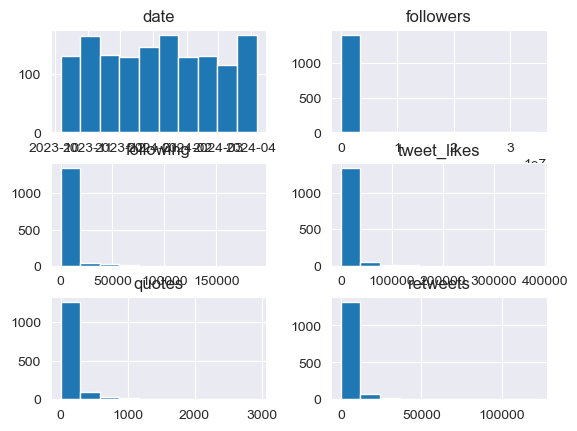

In [13]:
df.hist()

In [ ]:
# import openai
# import keys
# openai.api_key = keys.chat_gpt_token

In [ ]:
# def generate_answer(text):
#     try:
#         response = openai.ChatCompletion.create(
#             model="gpt-3.5-turbo",
#             messages=[
#                 {"role": "user", "content": text},
#             ]
#         )
# 
#         result = ''
#         for choice in response.choices:
#             result += choice.message.content
# 
#     except Exception as e:
#         return f"Oops!! Some problems with openAI. Reason: {e}"
#         
#     return result

In [ ]:
# def analyse_tweets(df):
#     if not df['date'].empty:
#         for index, text in enumerate(df['text']):
#             answer = generate_answer('''
#             Objective: Analyze tweets and determine if they contain antisemitic, anti-Zionist, or anti-Israel content. Respond only with "Yes" or "No".
#             Guidelines:
#              Antisemitic content:
#               References to harmful stereotypes about Jewish people.
#               Accusing or condemning Israel of genocide of Palestinians.
#               «Free Palestine» or «From the river to the sea» slogans.
#               Сlaiming that Israel is doing fake news.
#               Conspiracy theories involving Jewish people controlling governments, media, or the world.
#               Holocaust denial or trivialization.
#               Use of antisemitic slurs or symbols.
#              Anti-Zionist content:
#               Zionism is fascism or Zionism is racism or Zionism is nazism.
#               Demonization of Zionism as a racist or colonialist ideology.
#               Denial of Israel's right to exist.
#               Comparing Israeli people with nazi and Hitler.
#              Anti-Israel content:
#               Portraying Israel as an illegitimate or illegal state, often using terms like "apartheid state" or "occupying power».
#               Accusing Israel or Israels people of lying.
#               Accusing Israels government and Netanyahu of lying. Tweet:''' + text)
#             print(f"{text}, Answer: {answer}")
#             if answer.lower() == 'yes':
#                 df.at[index, 'antisemitic_post'] = True
#                 df.at[index, 'non_antisemitic_post'] = False
#             elif answer.lower() == 'no':
#                 df.at[index, 'antisemitic_post'] = False
#                 df.at[index, 'non_antisemitic_post'] = True
#     return df

In [ ]:
# analyse_tweets(df)

In [ ]:
# def analyse_location(df):
#     for index, location in enumerate(df['user_location']):
#         answer = generate_answer('''
#         Objective: Analyze location and determine what country it is. Respond only with Full names of country, without abbreviations country (if it is 'United States' or 'United States of America' respond 'United States of America'). If you cant determine the country, respond 'Unknown'.
#          Location:''' + location)
#         print(f"{location}, Answer: {answer}")
#         df.at[index, 'country'] = answer
#     return df

In [ ]:
# analyse_location(df)

In [ ]:
# df = df.fillna({'antisemitic_post': df['antisemitic_post'].mode()[0]})
# df = df.fillna({'non_antisemitic_post': df['non_antisemitic_post'].mode()[0]})

In [71]:
# df_analysed = df

In [3]:
import pandas as pd

In [196]:
df_analysed = pd.read_csv('analysed_df_with_countries(final2).csv')

In [197]:
df_analysed = df_analysed.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [198]:
df_analysed

,type,date,url,text,user,user_url,user_location,followers,following,account_creation_date,tweet_likes,quotes,retweets,antisemitic_post,non_antisemitic_post,country
0,tweet,2023-10-23 10:00:02+00:00,https://twitter.com/ShaykhSulaiman/status/1716...,EXTREME CENSORSHIP - THESE SAME PEOPLE CRIED W...,ShaykhSulaiman,https://x.com/ShaykhSulaiman,UK,466037,433,23/03/2013,4286,51,1477,True,False,United Kingdom
1,tweet,2023-11-05 00:26:21+00:00,https://twitter.com/blackintheempir/status/172...,Zionism is racism and fascism on steroids,blackintheempir,https://x.com/blackintheempir,"Baltimore, MD",166044,22735,27/12/2017,2287,6,749,True,False,United States of America
2,tweet,2023-10-15 23:41:26+00:00,https://twitter.com/dancohen3000/status/171370...,Israeli “terrrorism expert” calls to carpet bo...,dancohen3000,https://x.com/dancohen3000,"Washington, DC",326535,2627,06/10/2011,748,33,406,True,False,United States of America
3,tweet,2023-11-04 04:58:06+00:00,https://twitter.com/meganshead/status/17206667...,Dear everyone who is frightened about rising a...,meganshead,https://x.com/meganshead,Cape Town,7647,2199,21/03/2009,315,7,97,True,False,South Africa
4,tweet,2023-10-27 23:46:41+00:00,https://twitter.com/NimaTavRood/status/1718051...,“Why are you pro-Palestine when you’re an athe...,NimaTavRood,https://x.com/NimaTavRood,Unknown,17184,4891,10/10/2013,165,3,25,False,True,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,tweet,2024-03-14 15:30:54+00:00,https://twitter.com/NiohBerg/status/1768298767...,"From the River to the Sea, Palestine will neve...",NiohBerg,https://x.com/NiohBerg,Limbo,43244,1904,04/10/2017,4770,22,372,True,False,Unknown
1414,tweet,2024-03-16 23:32:02+00:00,https://twitter.com/AgentP22/status/1769144625...,"Sounds very like ""From the river to the sea"".\...",AgentP22,https://x.com/AgentP22,United Kingdom,52479,4045,20/09/2012,1507,19,310,False,True,United Kingdom
1415,tweet,2024-03-15 08:53:54+00:00,https://twitter.com/DaveAtherton20/status/1768...,"This is Hamas Leader Khaled Mashal, asked abou...",DaveAtherton20,https://x.com/DaveAtherton20,London,162270,44762,09/02/2010,131,11,84,True,False,United Kingdom
1416,tweet,2024-03-29 15:56:03+00:00,https://twitter.com/BurninTRanch/status/177374...,Last night 3 Presidents descended on New York ...,BurninTRanch,https://x.com/BurninTRanch,Unknown,17078,14507,28/10/2022,84,2,30,False,True,Unknown


In [16]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

In [74]:
df_analysed.head()

,Unnamed: 0.1,Unnamed: 0,type,date,url,text,user,user_url,user_location,followers,following,account_creation_date,tweet_likes,quotes,retweets,antisemitic_post,non_antisemitic_post,country
0,0,0,tweet,2023-10-23 10:00:02+00:00,https://twitter.com/ShaykhSulaiman/status/1716...,EXTREME CENSORSHIP - THESE SAME PEOPLE CRIED W...,ShaykhSulaiman,https://x.com/ShaykhSulaiman,UK,466037,433,23/10/2023,4286,51,1477,True,False,United Kingdom
1,1,1,tweet,2023-11-05 00:26:21+00:00,https://twitter.com/blackintheempir/status/172...,Zionism is racism and fascism on steroids,blackintheempir,https://x.com/blackintheempir,"Baltimore, MD",166044,22735,5/11/2023,2287,6,749,True,False,United States of America
2,2,2,tweet,2023-10-15 23:41:26+00:00,https://twitter.com/dancohen3000/status/171370...,Israeli “terrrorism expert” calls to carpet bo...,dancohen3000,https://x.com/dancohen3000,"Washington, DC",326535,2627,15/10/2023,748,33,406,True,False,United States of America
3,3,3,tweet,2023-11-04 04:58:06+00:00,https://twitter.com/meganshead/status/17206667...,Dear everyone who is frightened about rising a...,meganshead,https://x.com/meganshead,Cape Town,7647,2199,4/11/2023,315,7,97,True,False,South Africa
4,4,4,tweet,2023-10-27 23:46:41+00:00,https://twitter.com/NimaTavRood/status/1718051...,“Why are you pro-Palestine when you’re an athe...,NimaTavRood,https://x.com/NimaTavRood,Unknown,17184,4891,27/10/2023,165,3,25,False,True,Unknown


In [75]:
df_analysed.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'type', 'date', 'url', 'text', 'user',
       'user_url', 'user_location', 'followers', 'following',
       'account_creation_date', 'tweet_likes', 'quotes', 'retweets',
       'antisemitic_post', 'non_antisemitic_post', 'country'],
      dtype='object')

In [258]:
# Calculate the counts of each user location
location_counts = df_analysed['country'].value_counts()

# Filter the DataFrame based on user locations that occur more than 10 times
df_analysed_over_10_loc = df_analysed[df_analysed['country'].isin(location_counts[location_counts > 5].index)]

# Group by 'user_location' and sum the antisemitic and non-antisemitic post counts
grouped_df = df_analysed_over_10_loc.groupby('country')[['antisemitic_post', 'non_antisemitic_post']].sum().reset_index()

In [259]:
grouped_df

,country,antisemitic_post,non_antisemitic_post
0,Australia,16,12
1,Canada,32,8
2,Denmark,8,4
3,Germany,8,0
4,India,7,5
5,Israel,13,22
6,Jordan,5,2
7,Palestine,13,3
8,South Africa,5,7
9,Ukraine,3,3


In [260]:
grouped_df.columns

Index(['country', 'antisemitic_post', 'non_antisemitic_post'], dtype='object')

In [261]:
filtered_grouped_df = grouped_df[grouped_df['country'] != 'Unknown'].copy()  # Make a copy to avoid modifying the original DataFrame
filtered_grouped_df['Percentage'] = 100 * filtered_grouped_df['antisemitic_post'] / (filtered_grouped_df['non_antisemitic_post'] + filtered_grouped_df['antisemitic_post'])


In [262]:
filtered_grouped_df

,country,antisemitic_post,non_antisemitic_post,Percentage
0,Australia,16,12,57.142857
1,Canada,32,8,80.000000
2,Denmark,8,4,66.666667
3,Germany,8,0,100.000000
4,India,7,5,58.333333
5,Israel,13,22,37.142857
6,Jordan,5,2,71.428571
7,Palestine,13,3,81.250000
8,South Africa,5,7,41.666667
9,Ukraine,3,3,50.000000


In [263]:
graph_data = filtered_grouped_df[['country','Percentage']]
graph_pie_chart = filtered_grouped_df[['country','antisemitic_post']]

<Figure size 1000x600 with 0 Axes>

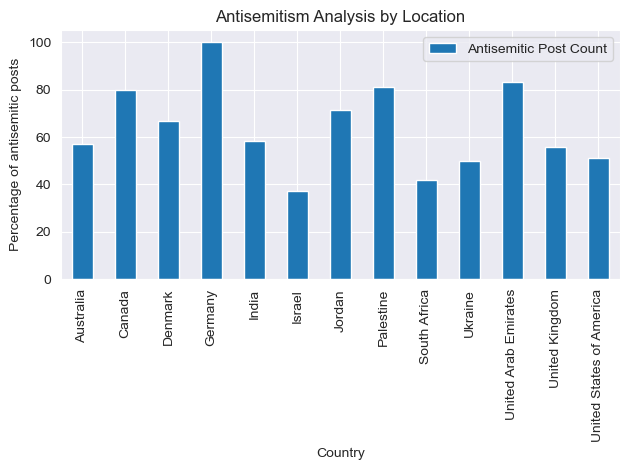

In [83]:
plt.figure(figsize=(10, 6))
graph_data.plot(kind="bar", stacked=True)
plt.title("Antisemitism Analysis by Location")
plt.xlabel("Country")
plt.ylabel("Percentage of antisemitic posts")
plt.xticks(rotation=90)
# Set country names as x-axis labels
plt.xticks(range(len(filtered_grouped_df.index)), filtered_grouped_df['country'])
plt.legend(["Antisemitic Post Count", "Non-Antisemitic Post Count"])
plt.tight_layout()
plt.show()


/var/folders/0y/9ghc01ls5k5bh2rpf5gh4whc0000gn/T/ipykernel_40722/921943157.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=graph_data, x='country', y='Percentage', palette=country_palette)


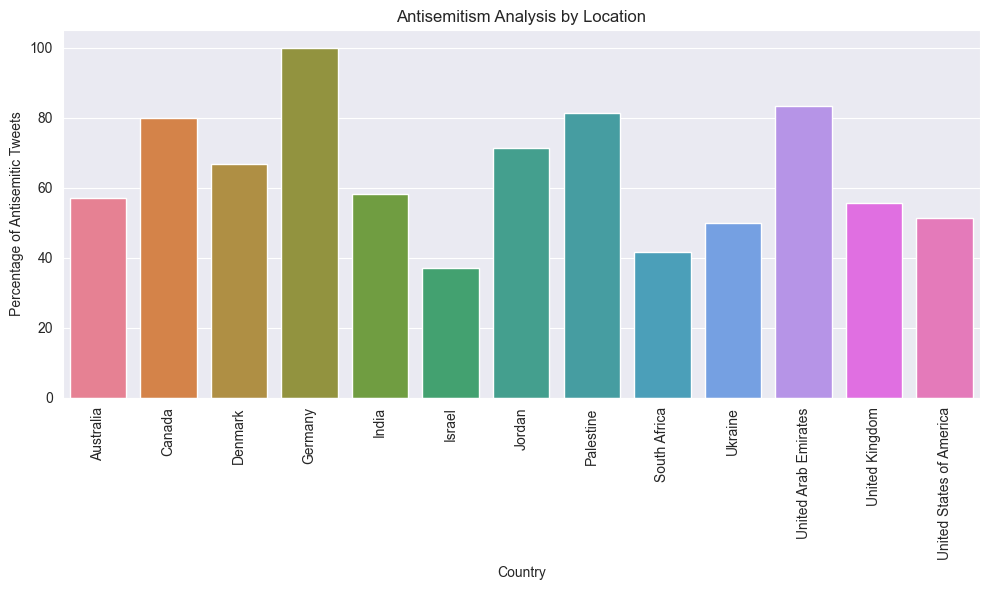

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette for each country
country_palette = sns.color_palette("husl", n_colors=len(graph_data['country'].unique()))

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=graph_data, x='country', y='Percentage', palette=country_palette)
plt.title("Antisemitism Analysis by Location")
plt.xlabel("Country")
plt.ylabel("Percentage of Antisemitic Tweets")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig("images/analysis_by_location.png")
plt.show()



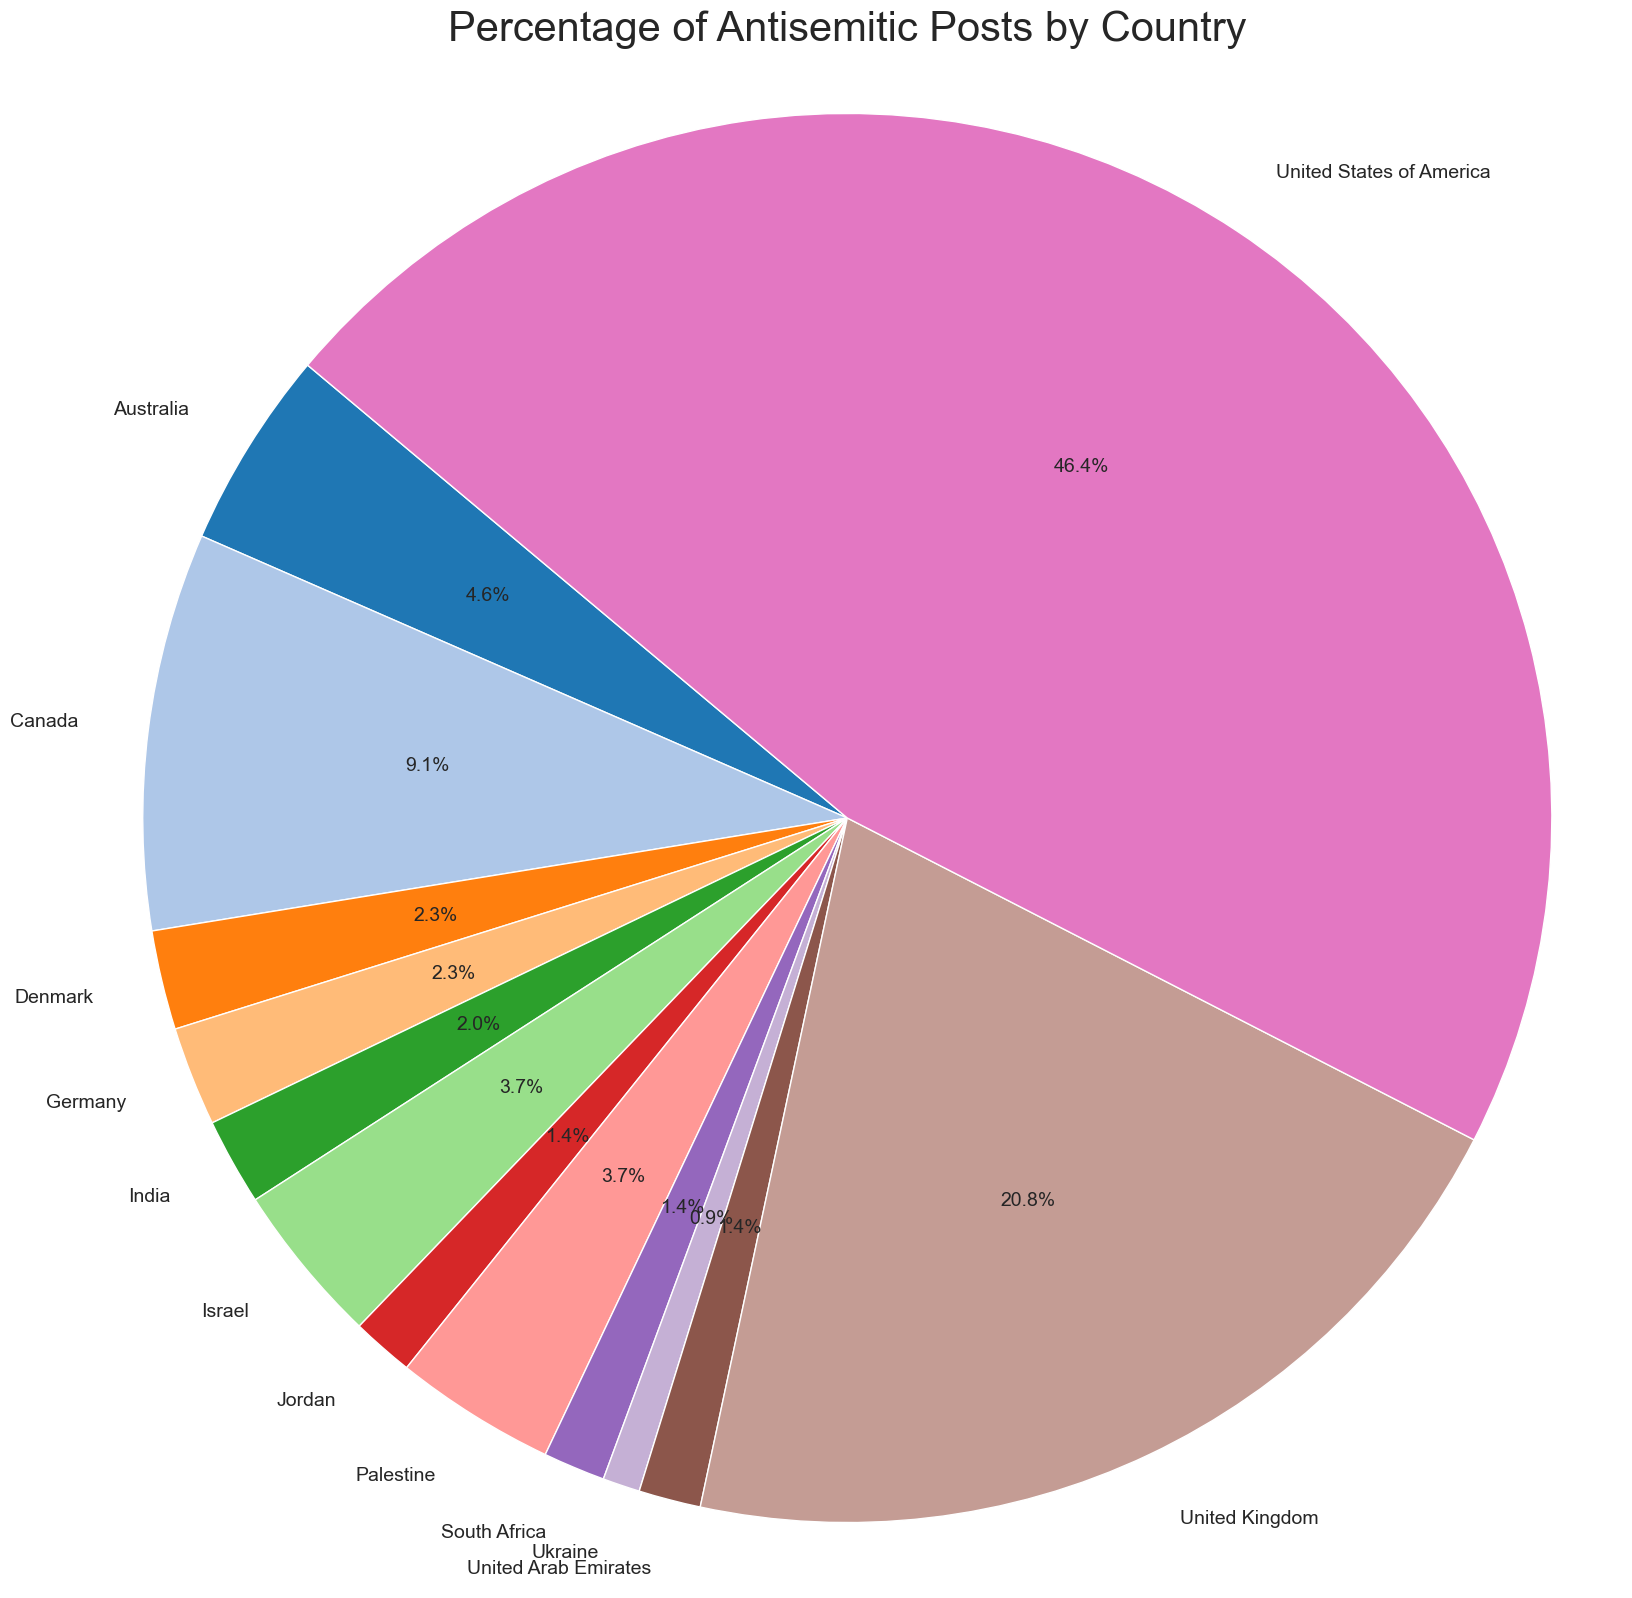

In [318]:
import matplotlib.pyplot as plt

# Assuming 'graph_data' is your DataFrame and it's already filtered to include only relevant data.
countries = graph_pie_chart['country']
percentages = graph_pie_chart['antisemitic_post']

# Create the pie chart
plt.figure(figsize=(20, 20))
plt.pie(percentages, labels=countries, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors, textprops={'fontsize': 14})
plt.title('Percentage of Antisemitic Posts by Country', size=30)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.savefig("images/piechart_by_location.png")
plt.show()


In [89]:
df_analysed.head()

,Unnamed: 0.1,Unnamed: 0,type,date,url,text,user,user_url,user_location,followers,following,account_creation_date,tweet_likes,quotes,retweets,antisemitic_post,non_antisemitic_post,country
0,0,0,tweet,2023-10-23 10:00:02+00:00,https://twitter.com/ShaykhSulaiman/status/1716...,EXTREME CENSORSHIP - THESE SAME PEOPLE CRIED W...,ShaykhSulaiman,https://x.com/ShaykhSulaiman,UK,466037,433,23/10/2023,4286,51,1477,True,False,United Kingdom
1,1,1,tweet,2023-11-05 00:26:21+00:00,https://twitter.com/blackintheempir/status/172...,Zionism is racism and fascism on steroids,blackintheempir,https://x.com/blackintheempir,"Baltimore, MD",166044,22735,5/11/2023,2287,6,749,True,False,United States of America
2,2,2,tweet,2023-10-15 23:41:26+00:00,https://twitter.com/dancohen3000/status/171370...,Israeli “terrrorism expert” calls to carpet bo...,dancohen3000,https://x.com/dancohen3000,"Washington, DC",326535,2627,15/10/2023,748,33,406,True,False,United States of America
3,3,3,tweet,2023-11-04 04:58:06+00:00,https://twitter.com/meganshead/status/17206667...,Dear everyone who is frightened about rising a...,meganshead,https://x.com/meganshead,Cape Town,7647,2199,4/11/2023,315,7,97,True,False,South Africa
4,4,4,tweet,2023-10-27 23:46:41+00:00,https://twitter.com/NimaTavRood/status/1718051...,“Why are you pro-Palestine when you’re an athe...,NimaTavRood,https://x.com/NimaTavRood,Unknown,17184,4891,27/10/2023,165,3,25,False,True,Unknown


In [291]:
antisemitic_tweets_by_user = df_analysed.groupby(['user','user_url'])[['antisemitic_post','non_antisemitic_post']].sum().reset_index()

In [292]:
antisemitic_tweets_by_user

,user,user_url,antisemitic_post,non_antisemitic_post
0,0thghtjustvibes,https://x.com/0thghtjustvibes,0,1
1,100_alpha,https://x.com/100_alpha,4,1
2,144pbangtan,https://x.com/144pbangtan,1,0
3,19hassan49,https://x.com/19hassan49,1,0
4,1KarenWyld,https://x.com/1KarenWyld,1,0
...,...,...,...,...
829,zach_kessel,https://x.com/zach_kessel,1,0
830,zaytoonbooks,https://x.com/zaytoonbooks,0,1
831,zehrazainab72,https://x.com/zehrazainab72,1,0
832,zei_squirrel,https://x.com/zei_squirrel,6,0


In [293]:
antisemitic_tweets_by_user = antisemitic_tweets_by_user[antisemitic_tweets_by_user['user']!= 'StopAntisemites']

In [294]:
top_10_antisemits = antisemitic_tweets_by_user.nlargest(10, 'antisemitic_post')

In [295]:
top_10_antisemits

,user,user_url,antisemitic_post,non_antisemitic_post
463,TorahJudaism,https://x.com/TorahJudaism,23,5
420,ShaykhSulaiman,https://x.com/ShaykhSulaiman,14,4
651,jacksonhinklle,https://x.com/jacksonhinklle,14,12
596,ecomarxi,https://x.com/ecomarxi,10,5
96,CensoredMen,https://x.com/CensoredMen,9,4
128,DrLoupis,https://x.com/DrLoupis,9,4
240,Kahlissee,https://x.com/Kahlissee,8,5
652,jakeshieldsajj,https://x.com/jakeshieldsajj,8,9
744,realRickWiles,https://x.com/realRickWiles,7,0
116,DaveAtherton20,https://x.com/DaveAtherton20,6,1


/var/folders/0y/9ghc01ls5k5bh2rpf5gh4whc0000gn/T/ipykernel_40722/533382561.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_antisemits, x='user', y='antisemitic_post', palette=country_palette)


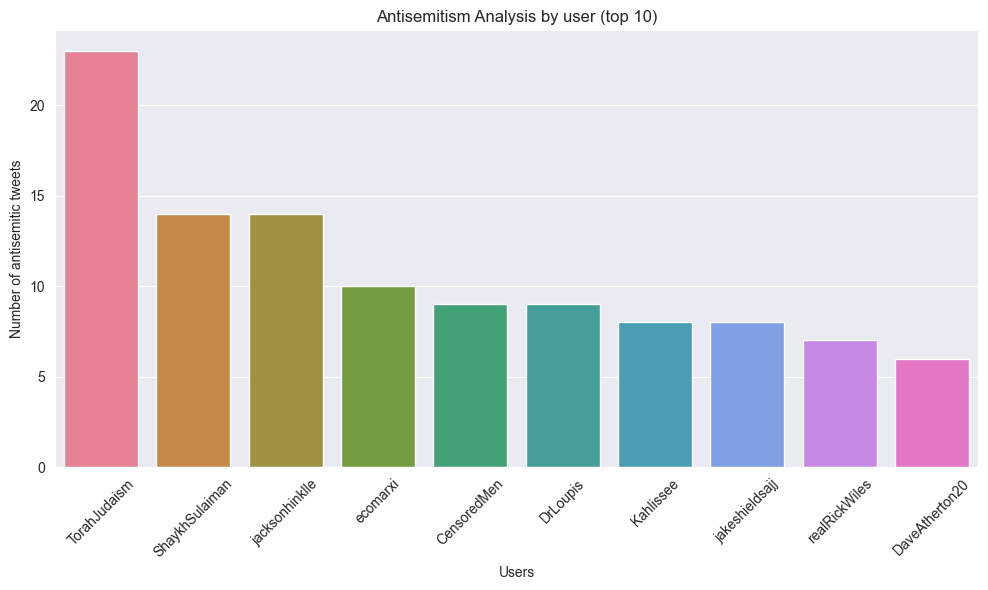

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette for each country
country_palette = sns.color_palette("husl", n_colors=len(top_10_antisemits['user'].unique()))

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_antisemits, x='user', y='antisemitic_post', palette=country_palette)
plt.title("Antisemitism Analysis by user (top 10)")
plt.xlabel("Users")
plt.ylabel("Number of antisemitic tweets")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig("images/hist_by_10users.png")
plt.show()

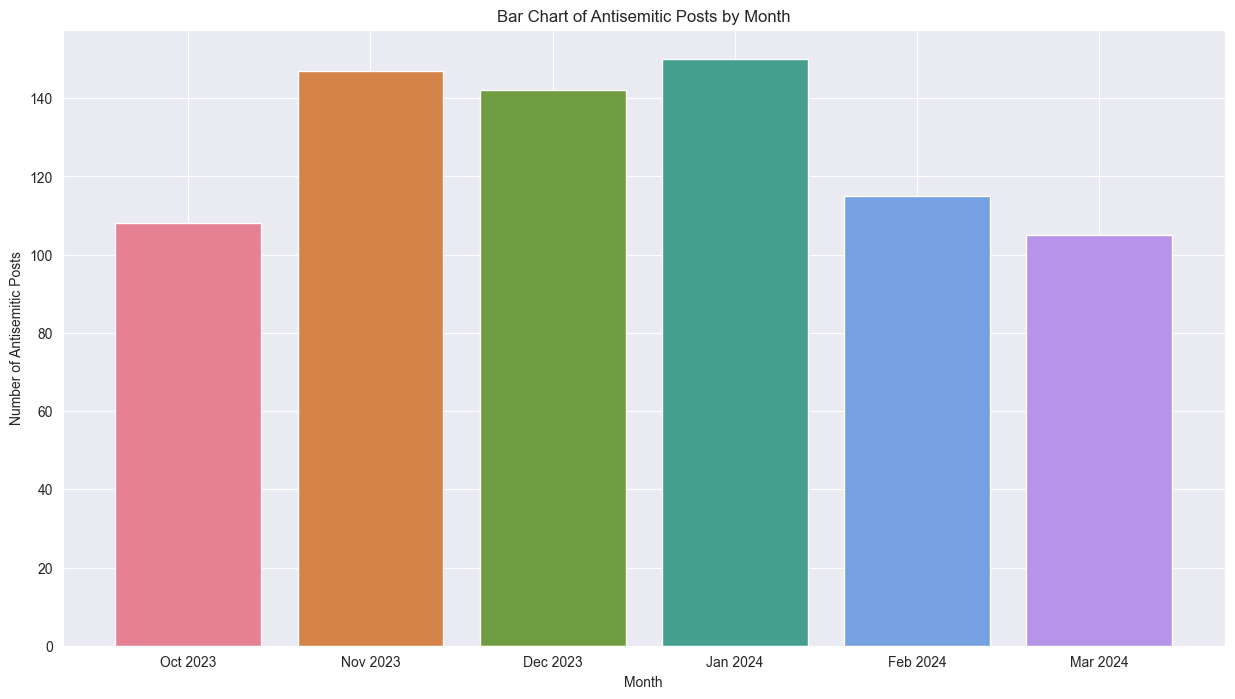

In [314]:
df_grouped_by_month = df_analysed.groupby(pd.to_datetime(df_analysed['date']).dt.month)['antisemitic_post'].sum().reset_index()
df_grouped_by_month['month'] = pd.to_datetime(df_grouped_by_month['date'], format='%m').dt.strftime('%b')

x_values = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']
y_values = df_grouped_by_month[df_grouped_by_month['month'].isin(x_values)]['antisemitic_post'].tolist()
y_values = [y_values[i] for i in [4, 5, 6, 0, 1, 2]]
x_values = ['Oct 2023', 'Nov 2023', 'Dec 2023', 'Jan 2024', 'Feb 2024', 'Mar 2024']
colors = ['#E68193', '#D48349', '#709D41', '#449F8E', '#75A0E2', '#B694E7', '#E47ABA']

plt.figure(figsize=(15, 8))
plt.bar(x_values, y_values, color=colors)
plt.xlabel('Month')
plt.ylabel('Number of Antisemitic Posts')
plt.title('Bar Chart of Antisemitic Posts by Month')
plt.savefig("images/barchart_by_month.png")
plt.show()



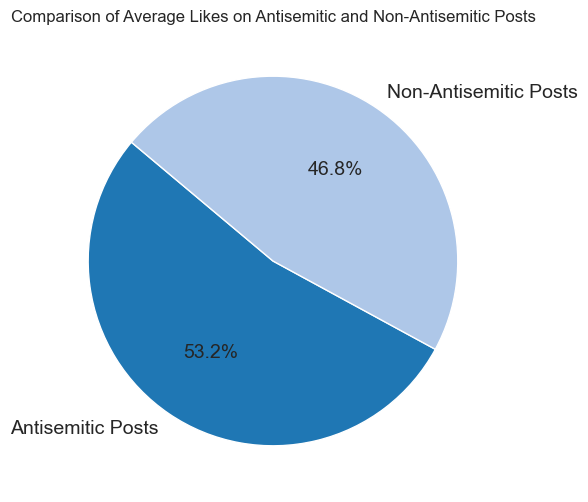

In [315]:
antisemitic_posts_count = df_analysed['antisemitic_post'].sum()
non_antisemitic_posts_count = df_analysed['non_antisemitic_post'].sum()
average_likes_antisemitic = df_analysed[df_analysed['antisemitic_post'] == 1]['tweet_likes'].mean()
average_likes_non_antisemitic = df_analysed[df_analysed['antisemitic_post'] == 0]['tweet_likes'].mean()
labels = ['Antisemitic Posts', 'Non-Antisemitic Posts']
values = [average_likes_antisemitic, average_likes_non_antisemitic]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors, textprops={'fontsize': 14})

plt.title('Comparison of Average Likes on Antisemitic and Non-Antisemitic Posts')
plt.savefig("images/piechart_avarage_likes.png")
plt.show()

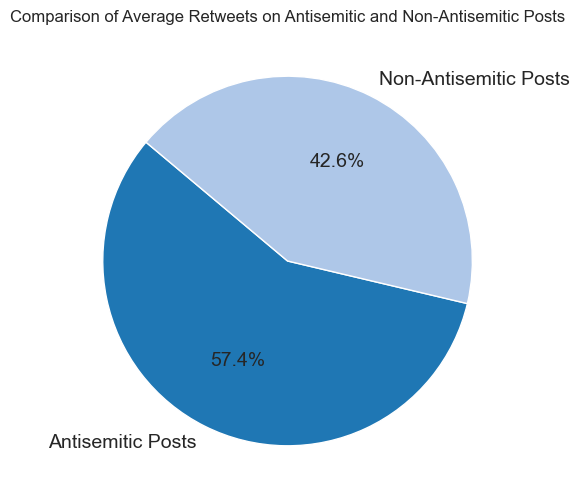

In [316]:
average_retweets_antisemitic = df_analysed[df_analysed['antisemitic_post'] == 1]['retweets'].mean()
average_retweets_non_antisemitic = df_analysed[df_analysed['antisemitic_post'] == 0]['retweets'].mean()

labels = ['Antisemitic Posts', 'Non-Antisemitic Posts']
values = [average_retweets_antisemitic, average_retweets_non_antisemitic]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors, textprops={'fontsize': 14})

plt.title('Comparison of Average Retweets on Antisemitic and Non-Antisemitic Posts')
plt.savefig("images/piechart_avarage_retweets.png")
plt.show()


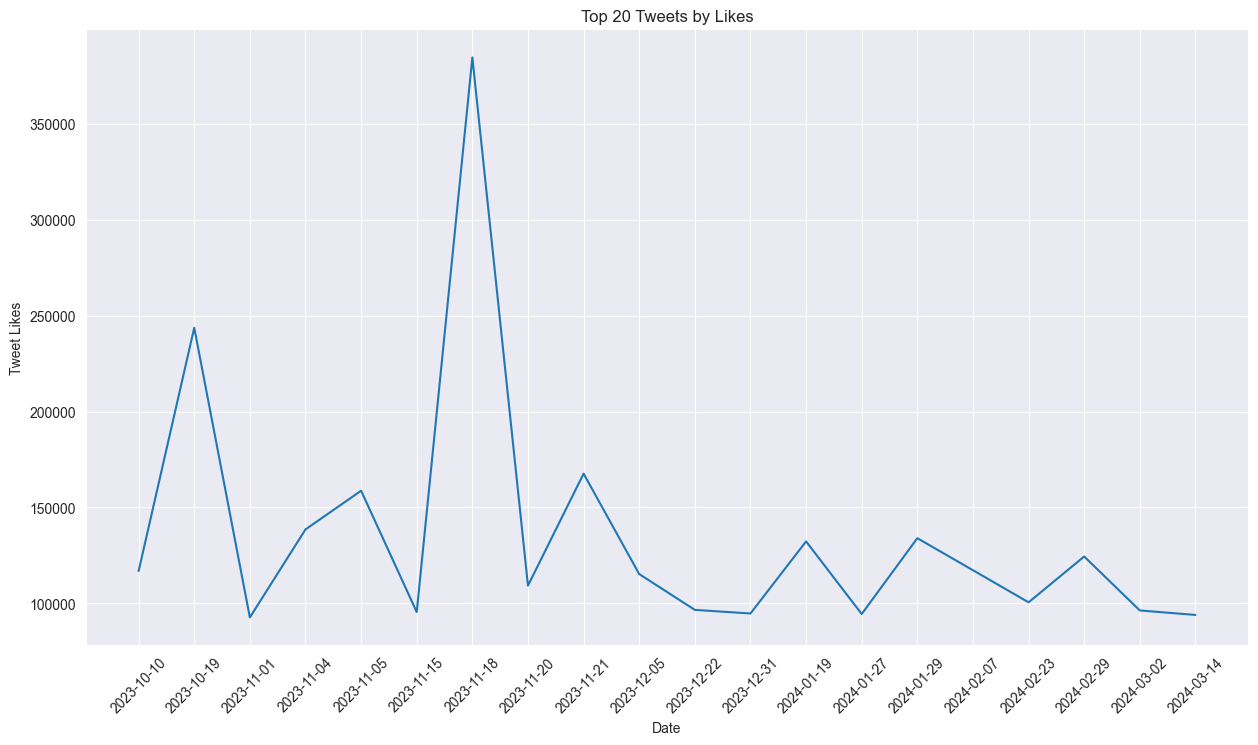

In [327]:
df_top_20 = df_analysed.sort_values(by=['tweet_likes'], ascending=False).head(20)
df_top_20 = df_top_20.sort_values(by=['date'])
df_top_20['date']  = pd.to_datetime(df_top_20['date']).dt.strftime('%Y-%m-%d')
plt.figure(figsize=(15, 8))
plt.plot(df_top_20['date'], df_top_20['tweet_likes'])
plt.xlabel('Date')
plt.ylabel('Tweet Likes')
plt.title('Top 20 Tweets by Likes')
plt.xticks(rotation=45)
plt.savefig("images/lineplot_top20tweets.png")
plt.show()


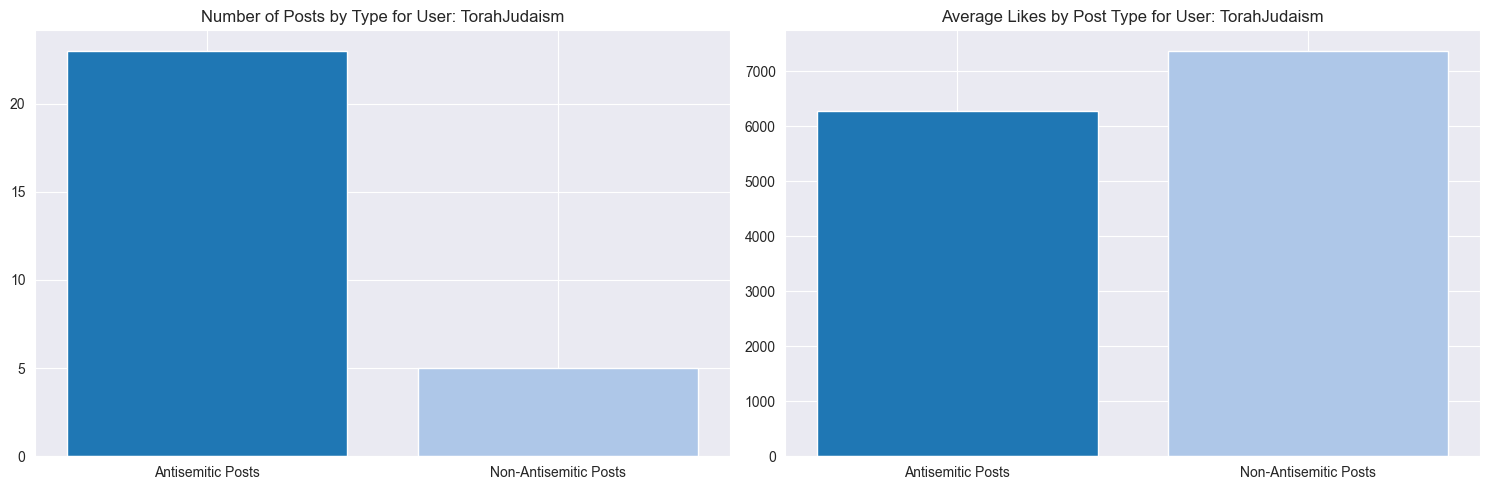

In [326]:
# Find the user with the most antisemitic posts

user_most_antisemitic_posts = df_analysed.groupby('user')['antisemitic_post'].sum().sort_values(ascending=False).index[0]

df_user = df_analysed[df_analysed['user'] == user_most_antisemitic_posts]

antisemitic_posts_count = df_user['antisemitic_post'].sum()
non_antisemitic_posts_count = df_user['non_antisemitic_post'].sum()

average_likes_antisemitic = df_user[df_user['antisemitic_post'] == 1]['tweet_likes'].mean()
average_likes_non_antisemitic = df_user[df_user['antisemitic_post'] == 0]['tweet_likes'].mean()

labels = ['Antisemitic Posts', 'Non-Antisemitic Posts']
values = [antisemitic_posts_count, non_antisemitic_posts_count]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
colors = ['#1F77B4', '#AEC7E8']
axs[0].bar(labels, values, color=colors)
axs[0].set_title('Number of Posts by Type for User: {}'.format(user_most_antisemitic_posts))

axs[1].bar(labels, [average_likes_antisemitic, average_likes_non_antisemitic], color=colors)
axs[1].set_title('Average Likes by Post Type for User: {}'.format(user_most_antisemitic_posts))

plt.tight_layout()
plt.savefig("images/user_analytics.png")
plt.show()

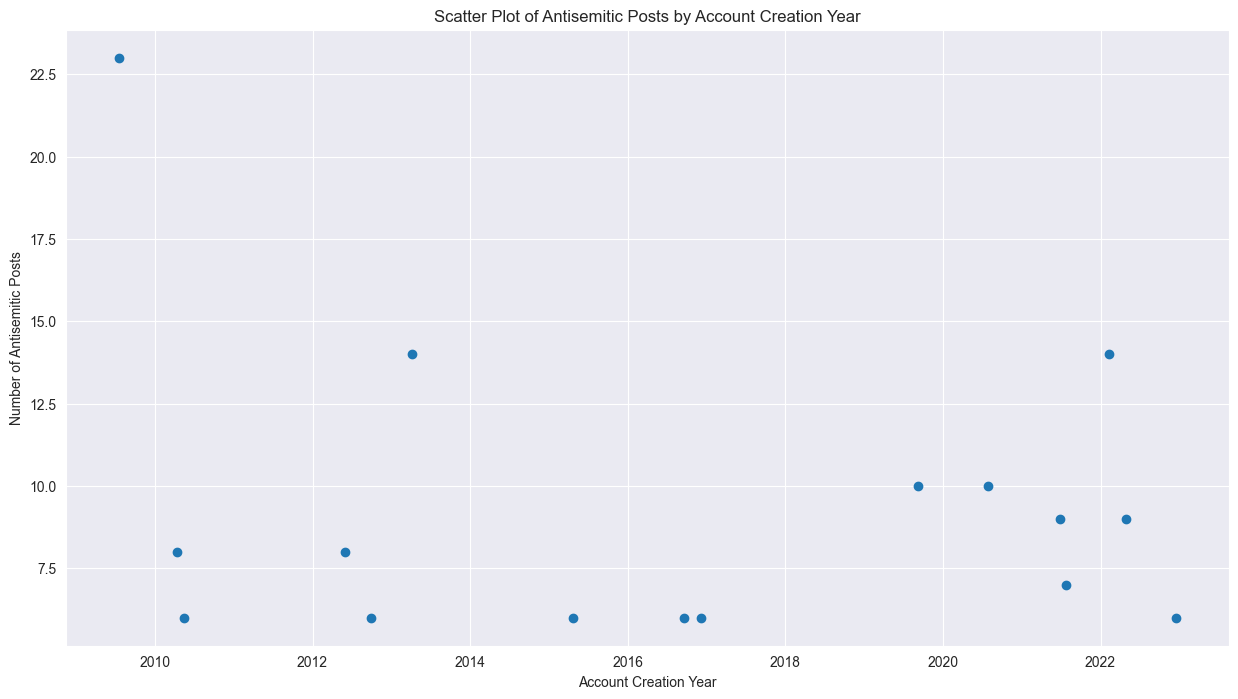

In [194]:
df_grouped_by_account_creation_date = df_analysed.groupby('account_creation_date')['antisemitic_post'].sum().reset_index()
df_grouped_by_account_creation_date = df_grouped_by_account_creation_date[df_grouped_by_account_creation_date['antisemitic_post'] > 5]

df_grouped_by_account_creation_date['account_creation_date'] = pd.to_datetime(df_analysed['account_creation_date'], dayfirst=True)

plt.figure(figsize=(15, 7))
plt.scatter(df_grouped_by_account_creation_date['account_creation_date'], df_grouped_by_account_creation_date['antisemitic_post'])
plt.xlabel('Account Creation Year')
plt.ylabel('Number of Antisemitic Posts')
plt.title('Scatter Plot of Antisemitic Posts by Account Creation Year')
plt.show()

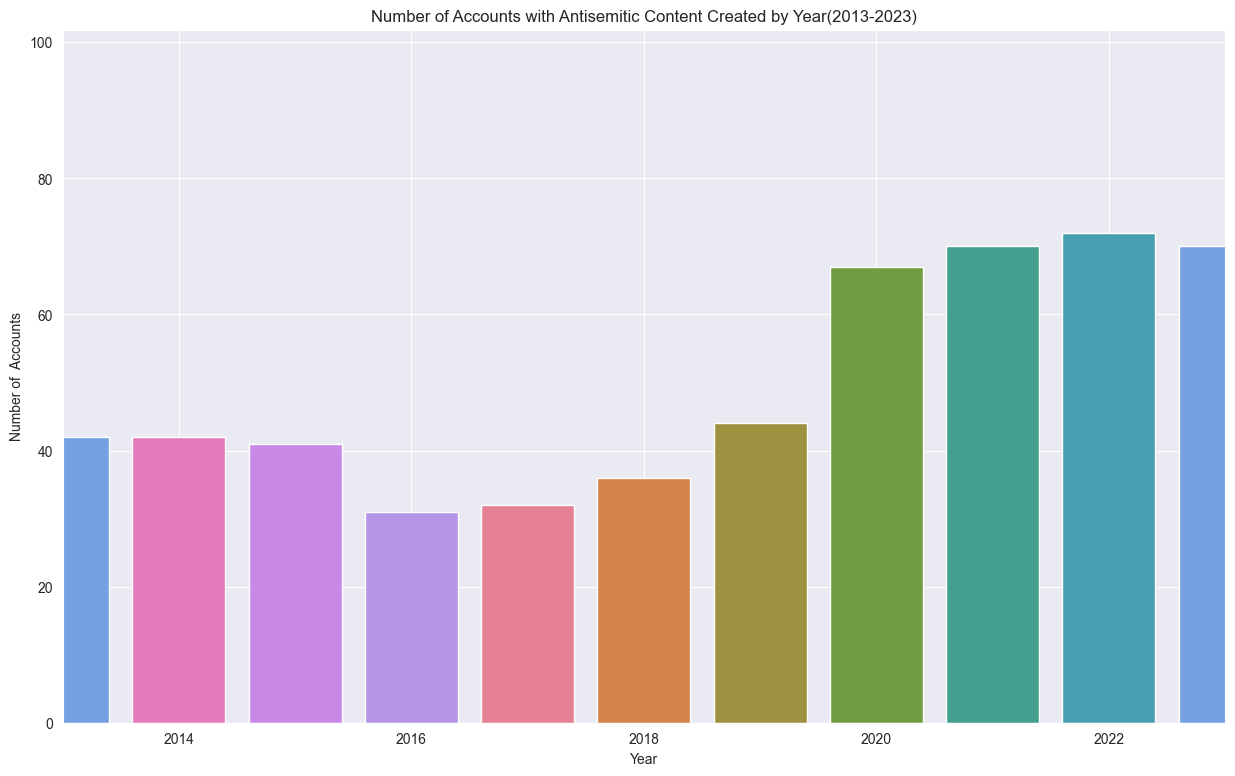

In [342]:
df_accounts_by_year = df_analysed.groupby('account_creation_date')['user'].nunique().reset_index()

# Extract the year from the account_creation_date column
df_accounts_by_year['account_creation_year'] = pd.to_datetime(df_accounts_by_year['account_creation_date'], dayfirst=True).dt.year

grouped = df_accounts_by_year.groupby('account_creation_year')['user'].sum().reset_index()
colors = ['#E68193', '#D48349', '#9E9241', '#709D41', '#449F8E', '#4A9EB4', '#75A0E2', '#E47ABA',  '#C789E5', '#B694E7']

# Create a bar chart
plt.figure(figsize=(15, 9))
plt.bar(grouped['account_creation_year'], grouped['user'], color=colors)
plt.xlabel('Year')
plt.ylabel('Number of  Accounts')
plt.title('Number of Accounts with Antisemitic Content Created by Year(2013-2023)')
plt.xlim([2013, 2023])
plt.savefig("images/hist_numb_acc_by_year.png")
plt.show()

In [174]:
grouped

,account_creation_year,user
0,2007,3
1,2008,27
2,2009,97
3,2010,49
4,2011,56
5,2012,53
6,2013,42
7,2014,42
8,2015,41
9,2016,31


/var/folders/0y/9ghc01ls5k5bh2rpf5gh4whc0000gn/T/ipykernel_40722/68924341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_filtered_likes['date'] = pd.to_datetime(df_user_filtered_likes['date'])


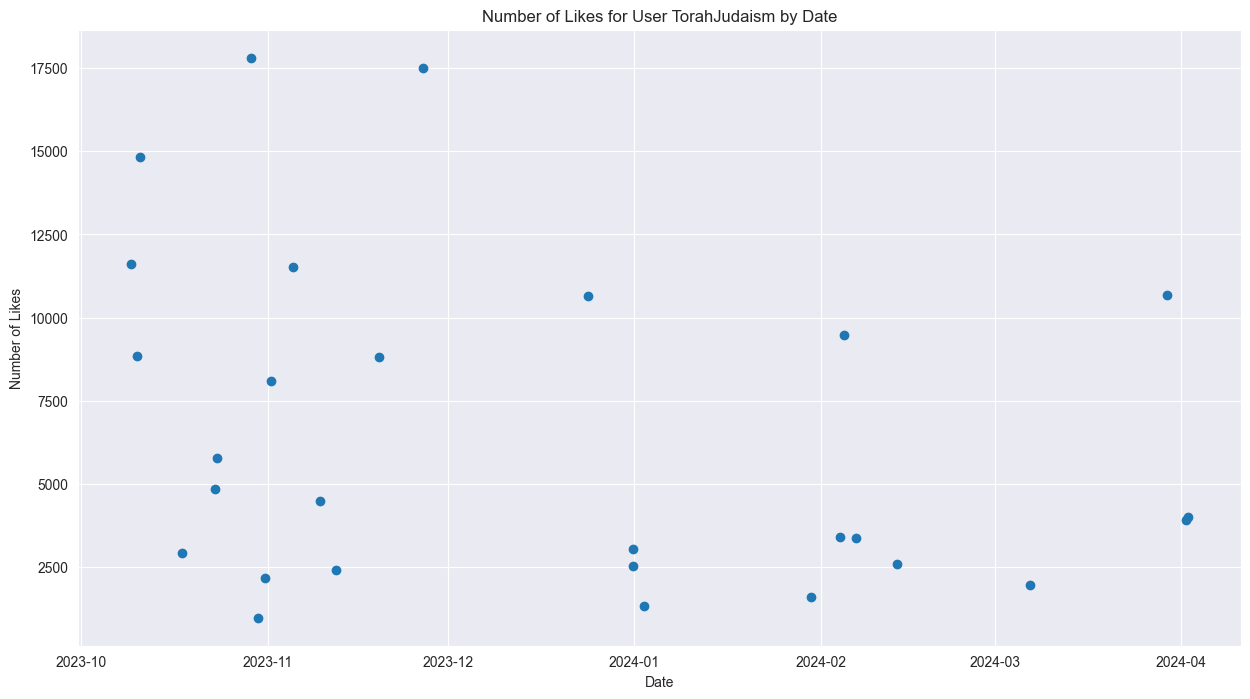

In [255]:
# Group the data by month and year
df_grouped_by_month_year2 = df_analysed
df_user_filtered_likes = df_grouped_by_month_year2[df_grouped_by_month_year2['user'] == 'TorahJudaism']

df_user_filtered_likes['date'] = pd.to_datetime(df_user_filtered_likes['date'])

df_user_filtered_likes = df_user_filtered_likes.groupby('date')['tweet_likes'].sum().reset_index()

plt.figure(figsize=(15, 8))
plt.scatter(df_user_filtered_likes['date'], df_user_filtered_likes['tweet_likes'])
plt.xlabel('Date')
plt.ylabel('Number of Likes')
plt.title('Number of Likes for User TorahJudaism by Date')
plt.show()
